# Cocaine and Crack

The survey asked about Crack separately from Cocaine even though it is a form of Cocaine. Different forms of Cocaine was also mentioned, such as powder, free base and coca paste, but the survey did not separate or ask about them separately. As many cases answered either the same for both or answered for Cocaine only, the data of the Cocaine is the one that got analyzed.

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [14]:
case_quest_data = dataset.ix[:,0:2].copy()
cocaine = dataset.ix[:,'COCEVER':'CC30EST'].copy() # cocaine dataset
crack = dataset.ix[:,'CRKEVER':'CR30EST'].copy() # crack dataset

In [15]:
# This function splits our data frame in predifined age groups
def cutDF(df):
    return pd.cut(
        df,[0, 10, 20, 30, 40, 50, 60, 70, 80], 
        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

* How many cases use the drug?

Not much cases tried or used Cocaine.

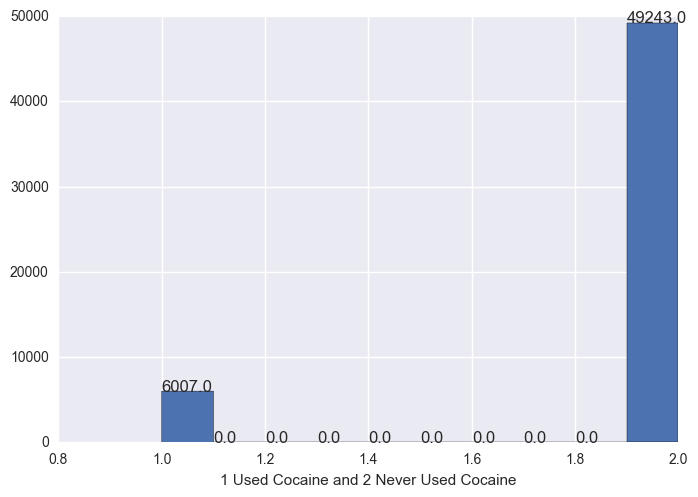

In [22]:
# extract how many ever used the drug
cocaine_ever = cocaine.ix[(cocaine['COCEVER'] < 3)].copy()
ax = cocaine_ever['COCEVER'].hist()
plt.xlabel('1 Used Cocaine and 2 Never Used Cocaine')

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

* What are their age range?

The age range of the majority who used Cocaine is 10 - 30, that is the teenagers and the young adults.

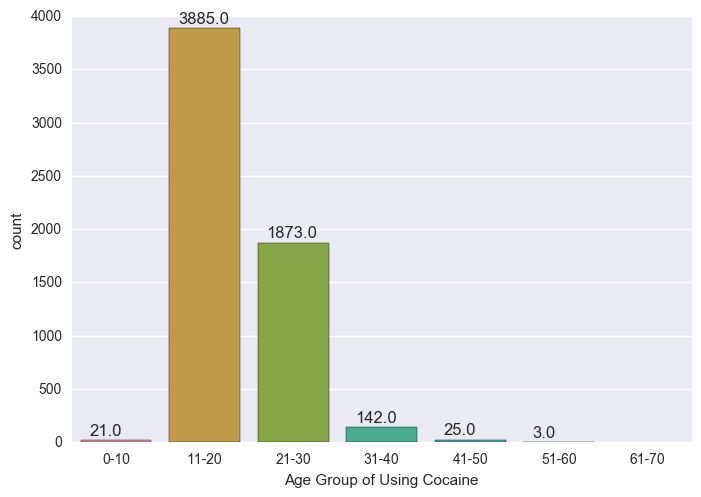

In [23]:
# extract the age range of those who ever used the drug
age_data = cocaine_ever.ix[(cocaine_ever['COCAGE'] < 90)].copy()
age_data['AgeGroup'] = age_data[['COCAGE']].apply(cutDF)
ax = sns.countplot(x=age_data['AgeGroup'], order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70'])
plt.xlabel('Age Group of Using Cocaine')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

* How frequently they use it?

From the below plot, it could be inferred that for those who used Cocaine does not use it much, usully less than 10 days during the last 30 days since the survey was conducted. Very few cases use it more than 15 days. What is interesting is that some cases, very few, older than 30 years used it more than 10 days.

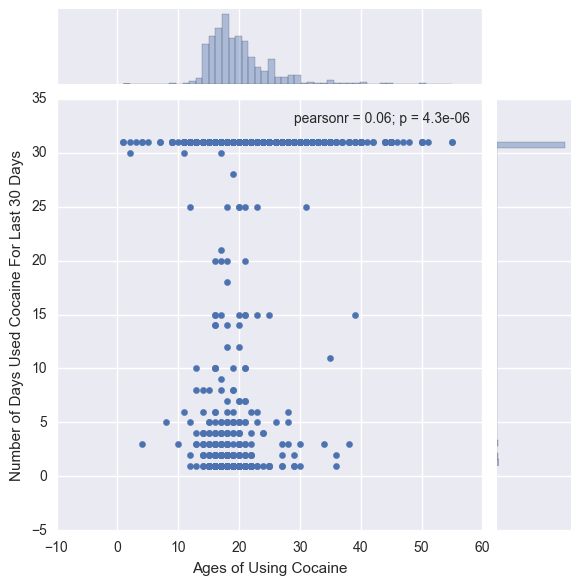

In [25]:
# estimate of number of days used the drug for the last 30 days
estHowMany = age_data.ix[(age_data['COCUS30A'] < 31) | (age_data['COCUS30A'] == 93)].copy()
estHowMany['COCUS30A'] = estHowMany.ix[:,'COCUS30A'].replace(to_replace=93, value=31)
sns.jointplot(x=estHowMany['COCAGE'],y=estHowMany['COCUS30A']).set_axis_labels("Ages of Using Cocaine", "Number of Days Used Cocaine For Last 30 Days");

* Did they stop and go back to it? Are they planning to quit?

Very few cases compared to the total number of cases who used cocaine used it within the past 30 days. However, very high amount of cases did not use Cocaine for more than 12 months. From this, it could be concluded that they eiher quit or just tried it.

1 = Within the past 30 days <br/>
2 = More than 30 days ago but within the past 12 mos <br/>
3 = More than 12 months ago <br/>

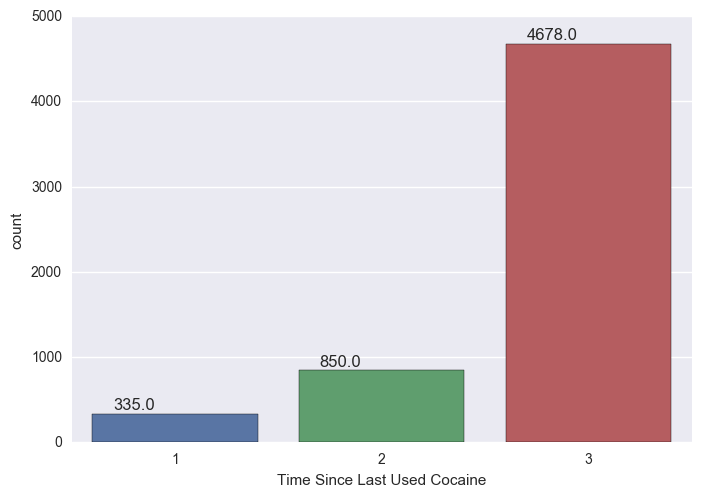

In [26]:
lastUsed = age_data.ix[(age_data['COCREC'] < 5)].copy()
ax = sns.countplot(lastUsed['COCREC'])
plt.xlabel('Time Since Last Used Cocaine')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Marijuana](Marijuana.ipynb)